In [ ]:
# Some required imports.
# Make sure you have these packages installed on your system.
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random as rd

In [ ]:
# Distance function used by the kmeans algorithm (euklidean distance)
def distance(a,b):
    return math.sqrt(math.pow(a[0]-b[0],2) + math.pow(a[1]-b[1],2))


In [ ]:
data_points = pd.read_csv("/content/cluster_data_points.csv") #Read the points from the content file.
print(len(data_points))

75


In [ ]:
from contextlib import nullcontext
# This method contains the implementation of the kmeans algorithm


def kmeans(data_points, num_clusters, termination_tol, max_iter):
  #Data_points - A Pandas DataFrame, where each row contains an x and y coordinate.
  #Num_clusters - Clusters to produce, = centroieds.
  #Termination_tol - Terminate when the total distance (sum of distance between each datapoint and its centroid) is smaller than termination_tol.
  #max_iter - stop after maximum max_iter iterations.

    clusters = {}

    for i in range(num_clusters): #Iterate for the amount of clusters.
        point = data_points.sample()
        x_val = point['x'].iloc[0]
        y_val = point['y'].iloc[0]
        position = (x_val, y_val)
        cluster = {'position': position, 'points': []}
        clusters[i] = cluster

    for j in range(max_iter):
        assignDataPointsToClusters(data_points, clusters)
        updateCentroidPosition(data_points, clusters)
        assignDataPointsToClusters(data_points, clusters)

    # Create DataFrame for the centroids
    centroids = pd.DataFrame([cluster['position'] for cluster in clusters.values()], columns=['x', 'y'])

    # Assign data points to clusters one last time to get cluster_assignments
    assignDataPointsToClusters(data_points, clusters)

    # List to store cluster assignments for each data point
    cluster_assignments = []

    for index, row in data_points.iterrows():
        current_datapoint = (row['x'], row['y'])

        # Check if the current data point exists in any cluster
        for cluster_id, cluster in clusters.items():
            if current_datapoint in cluster['points']:
                # If the data point is in the cluster, append the cluster ID
                cluster_assignments.append(cluster_id)

    # Add the cluster assignments to the data_points DataFrame
    data_points['cluster'] = cluster_assignments

    # Calculate the total distance.
    total_distance = calculateTotalDistance(data_points, clusters)

    return centroids, data_points, total_distance

def assignDataPointsToClusters(data_points, clusters):
    for index, row in data_points.iterrows():
        current_datapoint = (row['x'], row['y'])

        # Initialize a list to store distances for each cluster
        distances = []

        for cluster_id, cluster in clusters.items():
            dis = distance(current_datapoint, cluster['position'])
            distances.append(dis)

        # Find the cluster with the minimum distance
        curr_cluster = np.argmin(distances)

        # Append the current datapoint to the 'points' list of the closest cluster
        clusters[curr_cluster]['points'].append(current_datapoint)

    return clusters


def updateCentroidPosition(data_points, clusters):

  for i in range(len(clusters)): #För alla cluster
    points = np.array(clusters[i]['points']) #Hämta datapunkerna

    if points.shape[0] > 0:  #Om vi har datapunkter
      new_center = points.mean(axis=0) #Räkna ut medelvärdet för punkterna på column.
      clusters[i]['position'] = new_center #Sätt den nya positionen för centroid
      clusters[i]['points'] = [] #Töm den på de gamla datapunkterna.

  return clusters


def calculateTotalDistance(data_points, clusters):
  total_distance = 0

  for cluster_id, cluster in clusters.items():
    cluster_position = cluster['position']
    cluster_points = cluster['points']

    for data_point in cluster_points:
      total_distance += distance(data_point, cluster_position)

    return total_distance

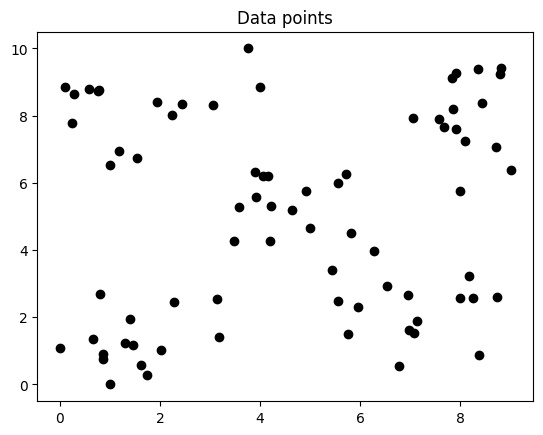

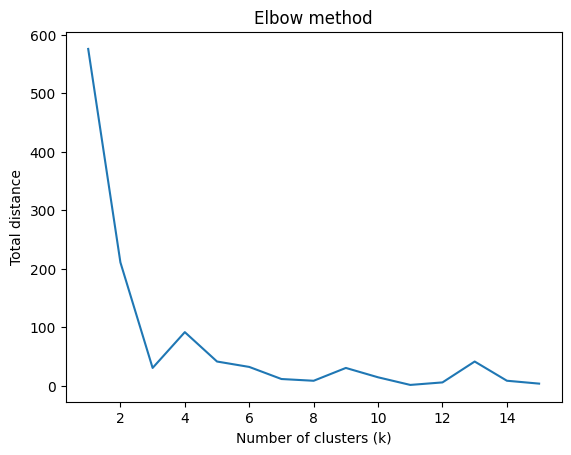

In [ ]:
# Test elbow method using this code

# Read data points from csv file
data_points = pd.read_csv("/content/cluster_data_points.csv")

# Set termination criteria
termination_tol = 0.001
max_iter = 100


# Plot random data using matplotlib
fig, ax = plt.subplots()
ax.scatter(data_points['x'], data_points['y'], c='black')
plt.title("Data points")
plt.show()


num_clusters_to_test = 15
total_dist_elbow = []

for k in range(1,num_clusters_to_test+1):
    kmeans_output = kmeans(data_points, k, termination_tol, max_iter)
    total_dist_elbow.append(kmeans_output[2])

#Plot elbow curve
plt.plot(list(range(1,num_clusters_to_test+1)), total_dist_elbow)
plt.title("Elbow method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Total distance")
plt.show()


Kmenas out:            x         y
0  4.581368  5.019337


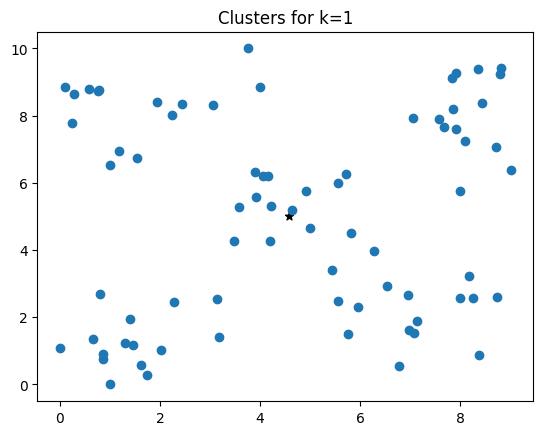

Kmenas out:            x         y
0  2.047119  4.914600
1  7.184111  5.126905


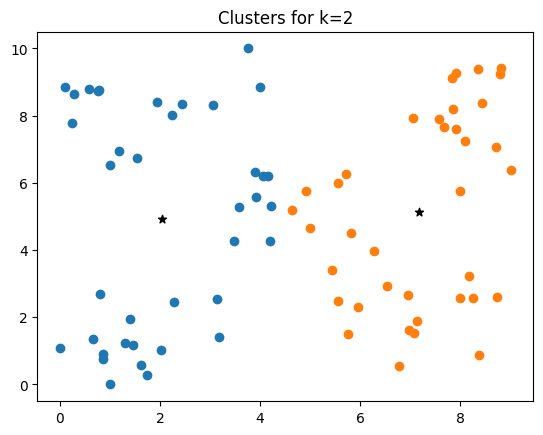

Kmenas out:            x         y
0  7.845805  7.812295
1  2.491380  7.377087
2  4.369206  2.113379


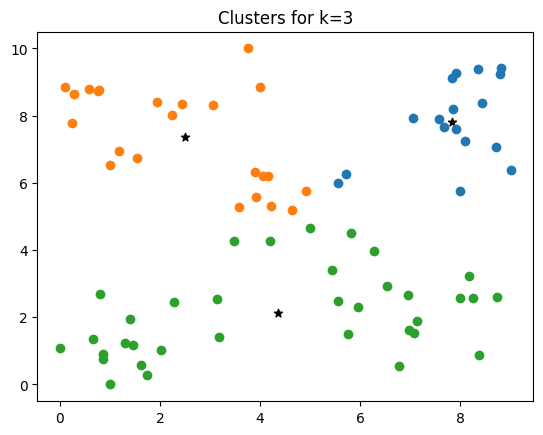

Kmenas out:            x         y
0  7.845805  7.812295
1  6.687855  2.642036
2  1.491646  1.300093
3  2.532501  7.247549


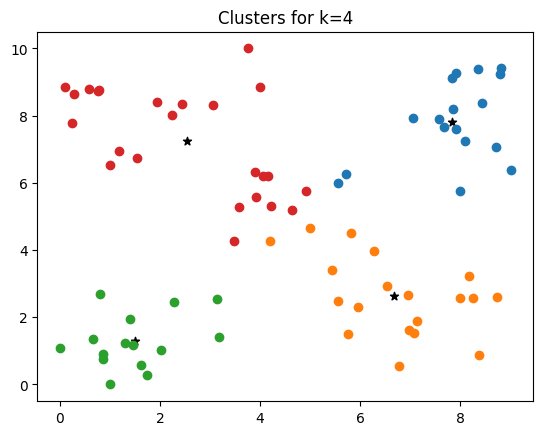

Kmenas out:            x         y
0  1.491646  1.300093
1  4.513386  5.417215
2  1.594219  8.253697
3  8.139132  8.037453
4  7.002518  2.296290


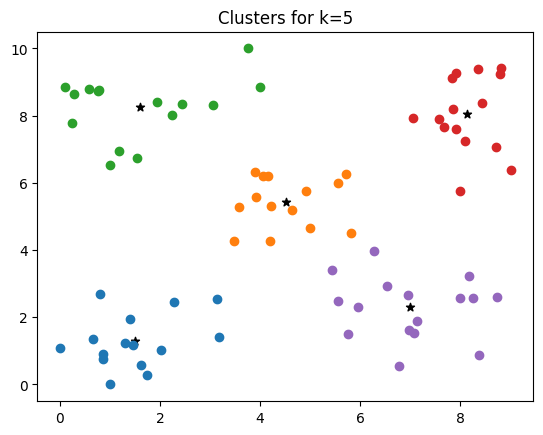

Kmenas out:            x         y
0  4.513386  5.417215
1  7.002518  2.296290
2  8.139132  8.037453
3  2.162301  2.211218
4  1.594219  8.253697
5  1.156318  0.844530


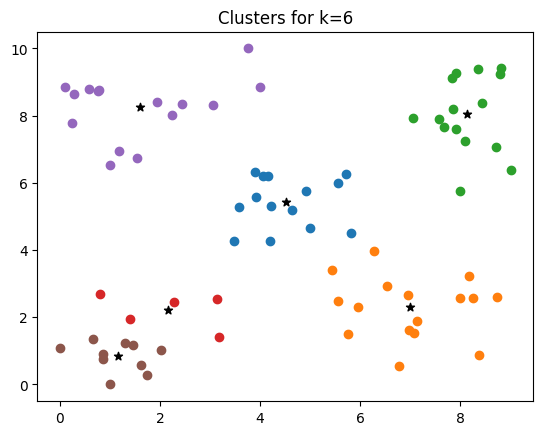

Kmenas out:            x         y
0  7.991492  7.310644
1  1.594219  8.253697
2  6.706303  1.596812
3  1.491646  1.300093
4  7.564946  2.938041
5  4.574843  5.282724
6  8.360590  9.127665


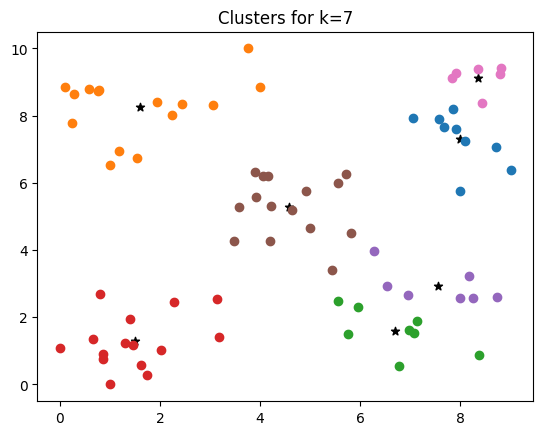

Kmenas out:            x         y
0  1.156318  0.844530
1  8.360590  9.127665
2  7.991492  7.310644
3  4.681703  5.201651
4  7.165746  2.096803
5  3.102189  8.713809
6  0.840234  8.023641
7  2.162301  2.211218


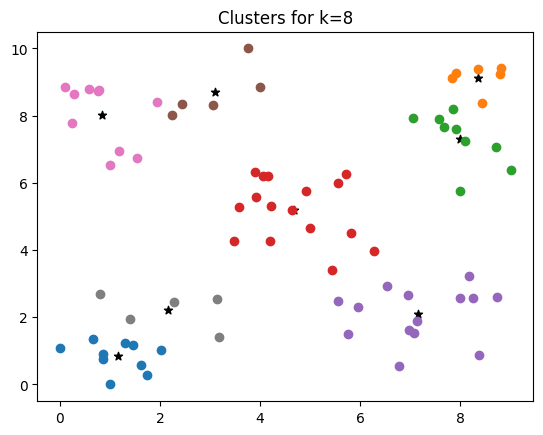

Kmenas out:            x         y
0  6.706303  1.596812
1  0.967493  8.024188
2  7.298732  2.995768
3  4.513386  5.417215
4  7.991492  7.310644
5  3.317715  8.884846
6  2.162301  2.211218
7  1.156318  0.844530
8  8.360590  9.127665


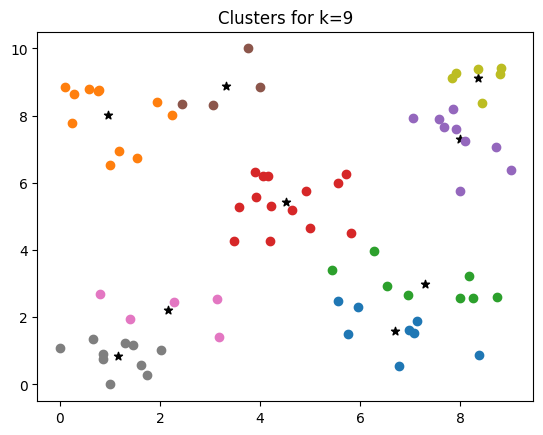

Kmenas out:            x         y
0  1.597150  1.041906
1  8.139132  8.037453
2  4.513386  5.417215
3  8.557743  1.741954
4  0.678167  0.830020
5  0.803884  2.691337
6  6.361068  2.023562
7  7.535037  3.008935
8  1.594219  8.253697
9  2.865690  2.136172


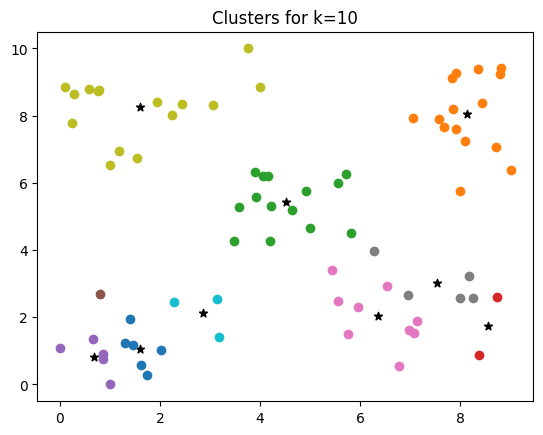

In [ ]:
# Plot clusters for different values of k using this code

data_points = pd.read_csv("cluster_data_points.csv")

termination_tol = 0.001
max_iter = 100

for k in range(1,11):


    kmeans_output = kmeans(data_points, k, termination_tol, max_iter)
    print("Kmenas out: ", kmeans_output[0])
    fig, ax = plt.subplots()
    ax.scatter(kmeans_output[0]['x'], kmeans_output[0]['y'], c='black', marker='*')

    for centroid_id in range(k):
        points = data_points.loc[kmeans_output[1]['cluster'] == centroid_id]

        ax.scatter(points['x'], points['y'])

    plt.title("Clusters for k=" + str(k))
    plt.show()
